In [1]:
import pandas as pd
import sklearn

In [3]:
df1=pd.read_csv('train-data.csv')

In [4]:
df1.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df1.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df1.shape

(6019, 14)

In [7]:
df1.drop('New_Price',axis=1,inplace=True)

In [8]:
df1.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [9]:
df1.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.shape

(5975, 13)

In [12]:
df1.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Exporting the preprocessed csv


In [13]:
#df1.to_csv('preprocessed_car.csv')

Exploratory data analysis


In [14]:
import matplotlib.pyplot as plt

In [15]:
cols=['Name','Location','Kilometers_Driven','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']
prd=['Price']

In [16]:
import seaborn as sns

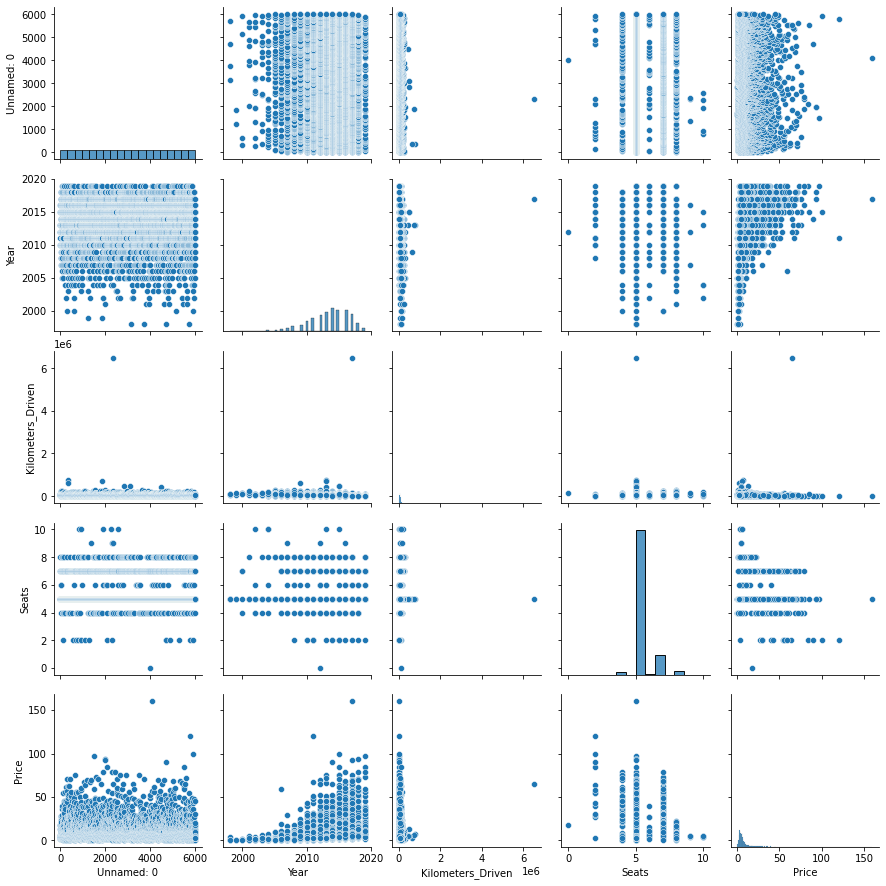

In [17]:
sns.pairplot(df1)

<AxesSubplot:xlabel='Year', ylabel='Price'>

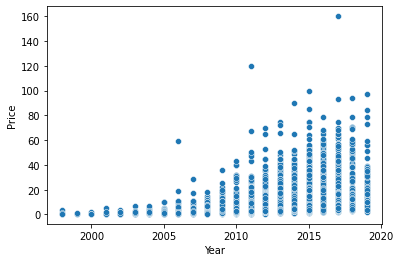

In [18]:
sns.scatterplot(x=df1['Year'],y=df1['Price'])

Creating the Model, we use XGBoost

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
y=df1.iloc[:,[12]]

In [21]:
df1

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [22]:

x=df1[['Year', 'Kilometers_Driven', 'Seats',]].copy()

In [23]:
x

,Year,Kilometers_Driven,Seats
0,2010,72000,5.0
1,2015,41000,5.0
2,2011,46000,5.0
3,2012,87000,7.0
4,2013,40670,5.0
...,...,...,...
6014,2014,27365,5.0
6015,2015,100000,5.0
6016,2012,55000,8.0
6017,2013,46000,5.0


In [24]:
x

,Year,Kilometers_Driven,Seats
0,2010,72000,5.0
1,2015,41000,5.0
2,2011,46000,5.0
3,2012,87000,7.0
4,2013,40670,5.0
...,...,...,...
6014,2014,27365,5.0
6015,2015,100000,5.0
6016,2012,55000,8.0
6017,2013,46000,5.0


In [25]:
x

,Year,Kilometers_Driven,Seats
0,2010,72000,5.0
1,2015,41000,5.0
2,2011,46000,5.0
3,2012,87000,7.0
4,2013,40670,5.0
...,...,...,...
6014,2014,27365,5.0
6015,2015,100000,5.0
6016,2012,55000,8.0
6017,2013,46000,5.0


In [26]:
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
model = XGBClassifier()
model.fit(X_train,y_train)

C:\Users\Huntler\anaconda3\envs\proj1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Huntler\anaconda3\envs\proj1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:53:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)